## Dataset Creation To Test Shape Bias In Discriminative and Contrastive Models

For the purpose of systematically evaluating our selected models (ViT, VGG, and CLIP) for their inductive biases due to image semantics, we focus on three factors: shape bias, texture bias, and color bias. In this notebook, we generate a dataset which tests the shape bias of our models, or the model’s ability to rely on object shape over other visual cues like texture or color. For this task, we choose the CIFAR-10G dataset which is a transformation of the CIFAR-10 dataset containing stylised out-of-domain generalisation test images for models trained with the CIFAR-10 dataset. This is convenient because we have already evaluated our models on the source dataset: the CIFAR-10 dataset. 

Reference(s):

- **Evans, B. D., Malhotra, G., & Bowers, J. S.** (2022). *Biological convolutions improve DNN robustness to noise and generalisation*. *Neural Networks, 148*, 96–110. [https://doi.org/10.1016/j.neunet.2021.12.005](https://doi.org/10.1016/j.neunet.2021.12.005)


#### Imports

In [5]:
import os
import shutil
from git import Repo
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import warnings
warnings.filterwarnings('ignore')

#### Repository Cloning

In [6]:
repo_url = 'https://github.com/bdevans/CIFAR-10G.git'
clone_dir = 'CIFAR-10G'


if not os.path.exists(clone_dir):
    print("Cloning the CIFAR-10G repository...")
    Repo.clone_from(repo_url, clone_dir)
    print("Repository cloned successfully.")
else:
    print("Repository already exists. Skipping clone.")


data_dir = os.path.join(clone_dir, '224x224')

Cloning the CIFAR-10G repository...
Repository cloned successfully.


The repository provides us with six variations of the test sets, with 10 images for each of the 10 classes (100 images per set):
- Line Drawings
- Line Drawings (inverted)
- Contours 
- Contours (inverted)
- Silhouettes 
- Silhouettes (inverted)

In [7]:
variations = ['line_drawings', 'line_drawings_inverted', 'contours', 'contours_inverted', 'silhouettes', 'silhouettes_inverted']

cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Saving visualizations to CWD

Processing dataset type: line_drawings
  - Saved visualization to plots/line_drawings_grid.png


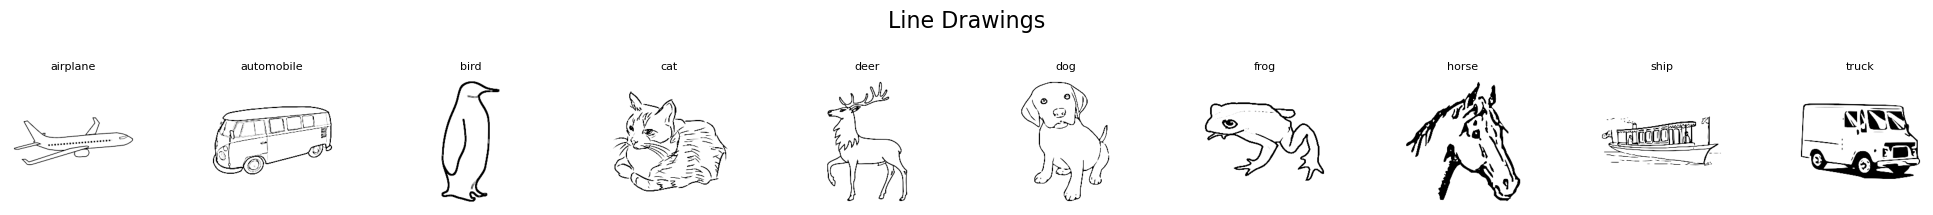

Processing dataset type: line_drawings_inverted
  - Saved visualization to plots/line_drawings_inverted_grid.png


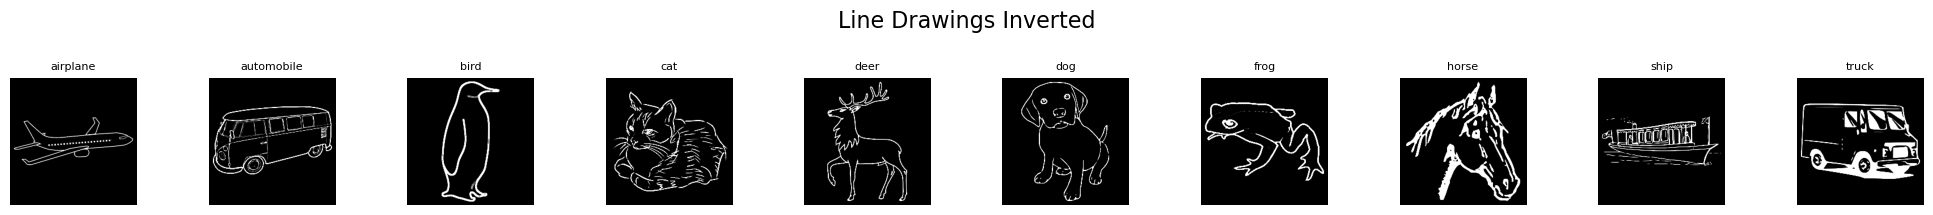

Processing dataset type: contours
  - Saved visualization to plots/contours_grid.png


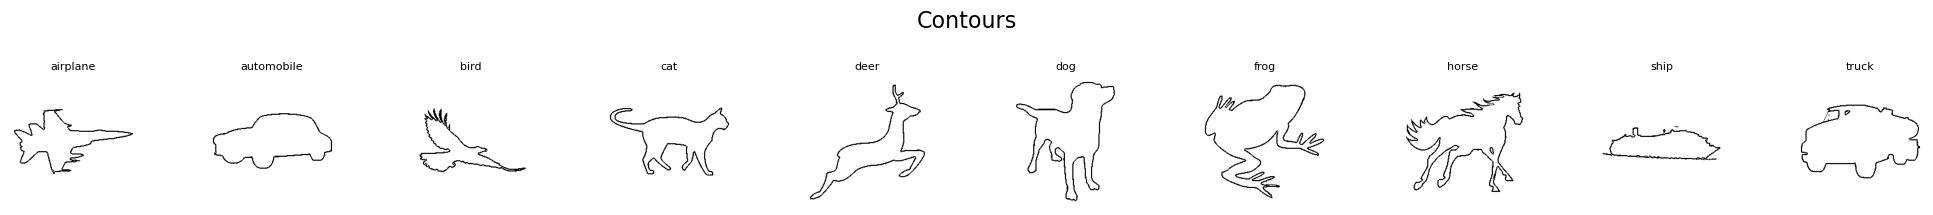

Processing dataset type: contours_inverted
  - Saved visualization to plots/contours_inverted_grid.png


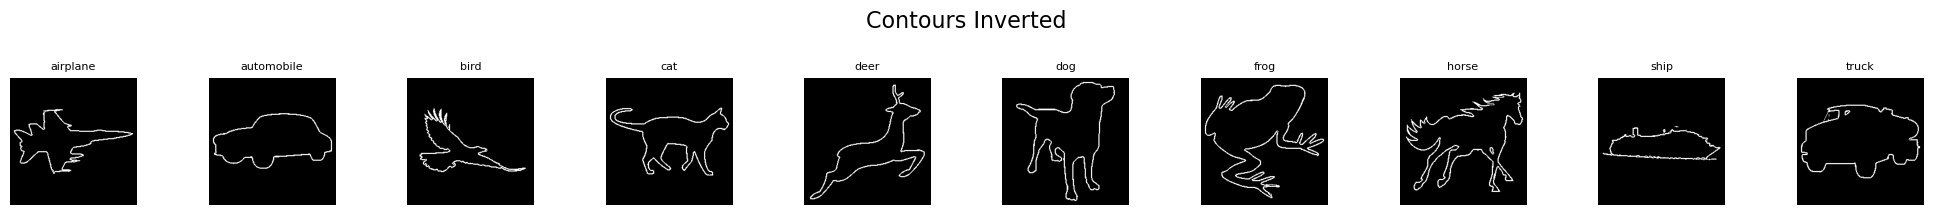

Processing dataset type: silhouettes
  - Saved visualization to plots/silhouettes_grid.png


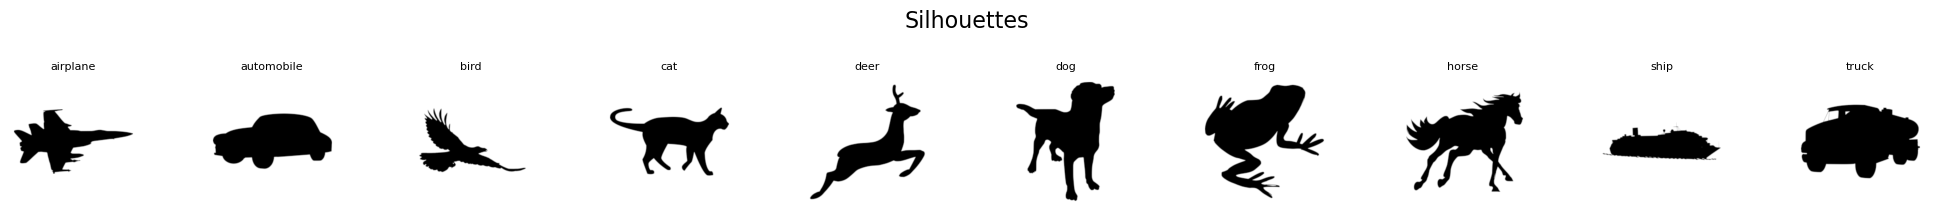

Processing dataset type: silhouettes_inverted
  - Saved visualization to plots/silhouettes_inverted_grid.png


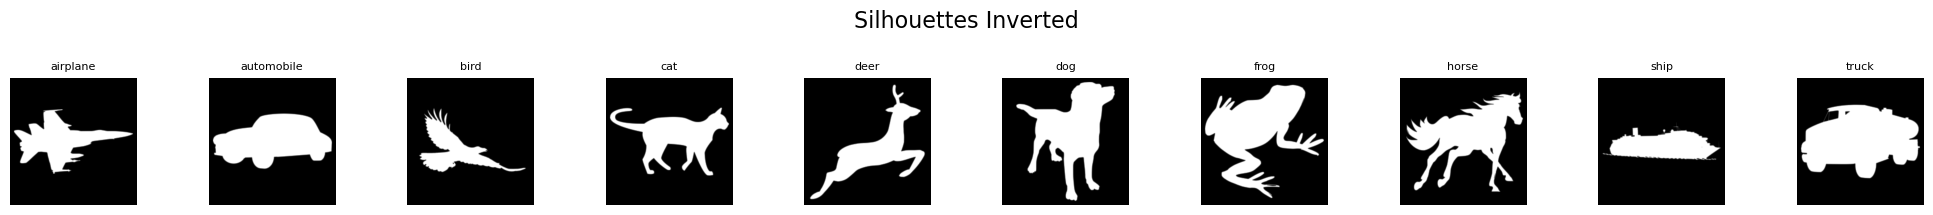

In [8]:
plots_dir = 'plots'
os.makedirs(plots_dir, exist_ok=True)

for variation in variations:

    print(f"Processing dataset type: {variation}")
    
    fig, axes = plt.subplots(1, 10, figsize=(20, 2))
    fig.suptitle(f'{variation.replace("_", " ").title()}', fontsize=16, y=1.05)
    
    for idx, cls in enumerate(cifar10_classes):
    
        cls_dir = os.path.join(data_dir, variation, cls)
        img_files = sorted(os.listdir(cls_dir))
        
        if not img_files:
            print(f"  - No images found in {cls_dir}. Skipping this class.")
            axes[idx].axis('off')
            axes[idx].set_title(cls, fontsize=8)
            continue
        
        img_path = os.path.join(cls_dir, img_files[0])
        img = mpimg.imread(img_path)
        

        if img.ndim == 3 and img.shape[2] == 3:
            axes[idx].imshow(img)
        else:
            axes[idx].imshow(img, cmap='gray')
        
        axes[idx].axis('off')
        axes[idx].set_title(cls, fontsize=8)
    
    plt.tight_layout()
    plot_path = os.path.join(plots_dir, f'{variation}_grid.png')
    
    plt.savefig(plot_path, bbox_inches='tight')
    print(f"  - Saved visualization to {plot_path}")
    
    plt.show()


Creating test sets in CWD.

In [9]:
current_dir = os.getcwd()

for variation in variations:

    src = os.path.join(data_dir, variation)
    dst = os.path.join(current_dir, variation)
    
    if os.path.exists(dst):
        print(f"Directory '{variation}' already exists in the current directory. Skipping copy.")
    else:
        shutil.copytree(src, dst)
        print(f"Copied '{variation}' to the current directory.")

Copied 'line_drawings' to the current directory.
Copied 'line_drawings_inverted' to the current directory.
Copied 'contours' to the current directory.
Copied 'contours_inverted' to the current directory.
Copied 'silhouettes' to the current directory.
Copied 'silhouettes_inverted' to the current directory.


Deleting Clone

In [10]:
if os.path.exists(clone_dir):
    shutil.rmtree(clone_dir)
    print(f"Removed cloned repository directory '{clone_dir}'.")

Removed cloned repository directory 'CIFAR-10G'.


Now, we can compare the shape accuracy of our discriminative models (ViT and VGG) and contrastive models (CLIP) when presented with shape-reliant data to the overall accuracy of our models across different models (recorded on source dataset, CIFAR-10) across multiple different visual cues. Formally, this comparison will be made to evaluate the shape bias of each model using the following ratio:

$$
\text{Shape Bias} = \frac{\text{Shape Accuracy}}{\text{Total Accuracy}}
$$

The reference for this formulation is as follows:

P. Gavrikov, J. Lukasik, S. Jung, R. Geirhos, B. Lamm, M. J. Mirza, M. Keuper, and J. Keuper. [Are vision language models texture or shape biased and can we steer them?](https://arxiv.org/abs/2403.09193), 2024.

 